In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2589,spam,Join the UK's horniest Dogging service and u c...,NaN,NaN,NaN
2443,ham,&lt;#&gt; great loxahatchee xmas tree burning...,NaN,NaN,NaN
3440,spam,Get a FREE mobile video player FREE movie. To ...,NaN,NaN,NaN
1992,spam,Free tones Hope you enjoyed your new content. ...,NaN,NaN,NaN
1112,ham,So that means you still think of teju,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
5068,ham,Hai dear friends... This is my new &amp; prese...
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...
3092,ham,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
4302,ham,Yup i'm free...


In [8]:
#remnaming the column

df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
1085,ham,FR'NDSHIP is like a needle of a clock. Though ...
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?
1568,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
4813,ham,Ummmmmaah Many many happy returns of d day my ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing value check
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

#EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

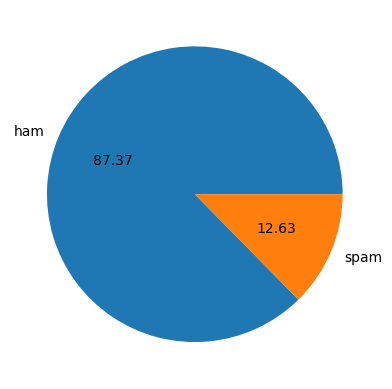

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
# data is imbalanced

In [22]:
import nltk

In [23]:
#!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_char']=df['text'].apply(len)
df['num_char']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_char, Length: 5169, dtype: int64

In [26]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
## number of words

In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
#nltk.download('punkt_tab')

In [30]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham
df[df['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

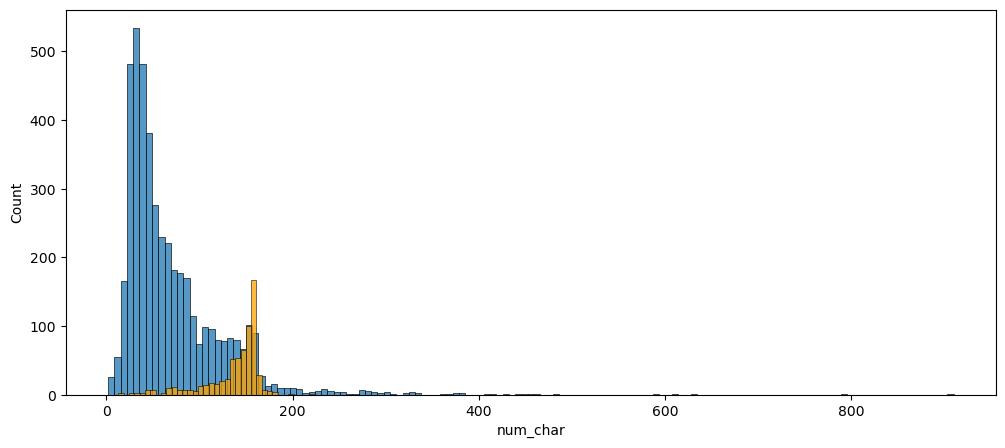

In [37]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_char'])#ham
sns.histplot(df[df['target']==1]['num_char'],color='orange')#spam

<Axes: xlabel='num_words', ylabel='Count'>

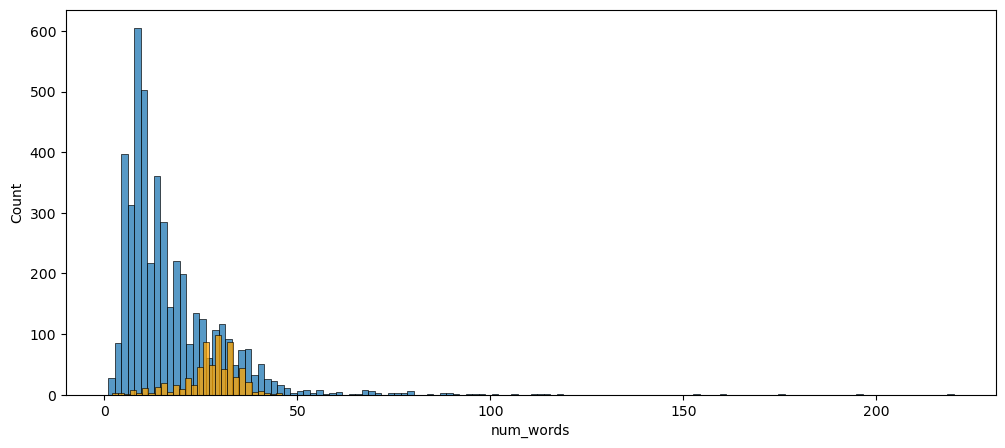

In [38]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])#ham
sns.histplot(df[df['target']==1]['num_words'],color='orange')#spam

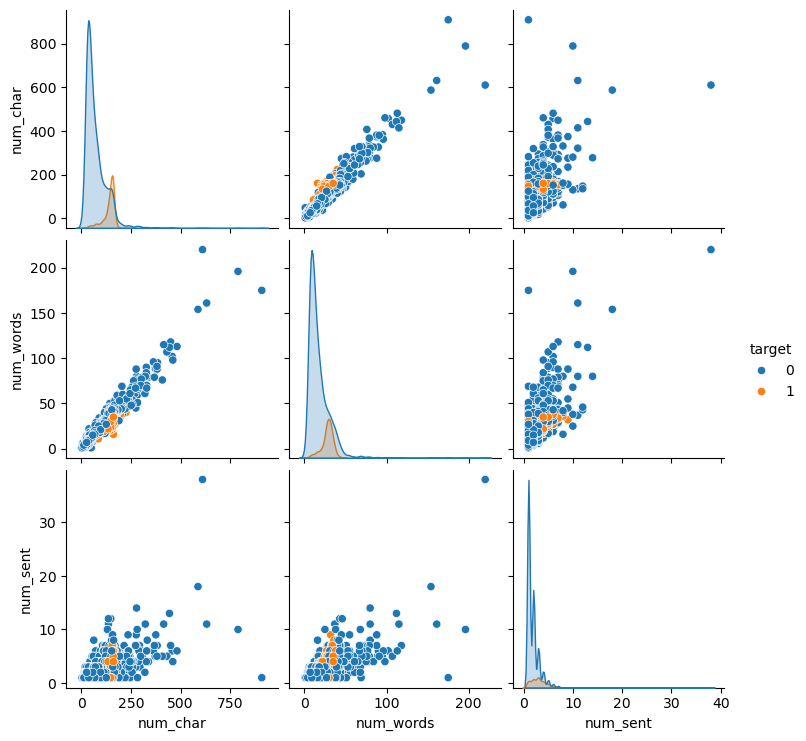

In [39]:
sns.pairplot(df, hue='target')

In [40]:
df.corr

<bound method DataFrame.corr of       target                                               text  num_char  \
0          0  Go until jurong point, crazy.. Available only ...       111   
1          0                      Ok lar... Joking wif u oni...        29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3          0  U dun say so early hor... U c already then say...        49   
4          0  Nah I don't think he goes to usf, he lives aro...        61   
...      ...                                                ...       ...   
5567       1  This is the 2nd time we have tried 2 contact u...       161   
5568       0              Will Ì_ b going to esplanade fr home?        37   
5569       0  Pity, * was in mood for that. So...any other s...        57   
5570       0  The guy did some bitching but I acted like i'd...       125   
5571       0                         Rofl. Its true to its name        26   

      num_words  num_sent  
0            24

<Axes: >

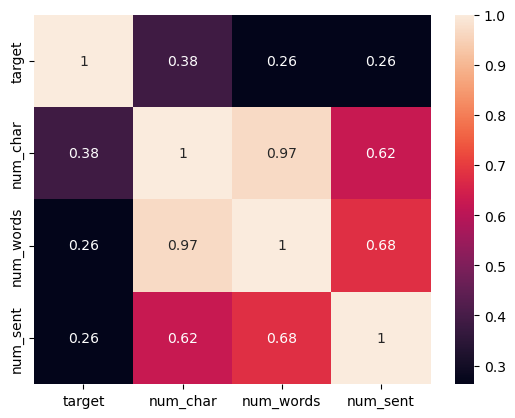

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA PREPROCESSING

In [52]:
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

        
    return " ".join(y)

In [54]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [55]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [60]:
df['transformed_text']= df['text'].apply(transform_text)

In [61]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [62]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [63]:
#!pip install wordcloud

In [64]:
#from wordcloud import WordCloud
#print("WordCloud installed successfully!")


In [65]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

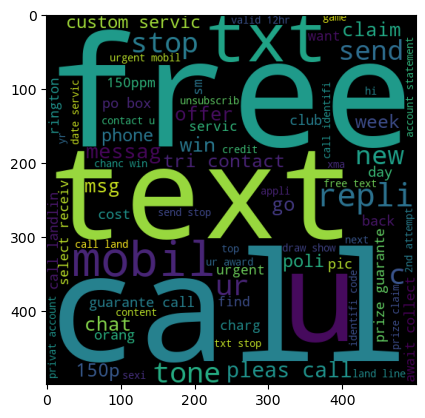

In [66]:
plt.imshow(spam_wc)

In [67]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

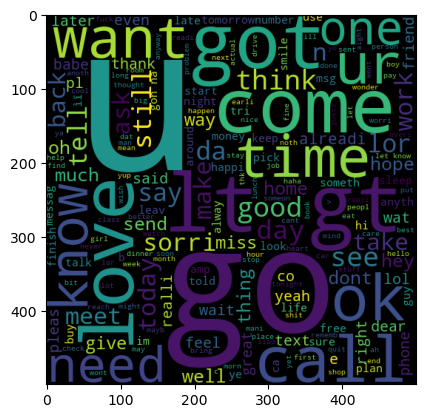

In [68]:
plt.imshow(ham_wc)

In [69]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [70]:
len(spam_corpus)

9939

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17940\1354100171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='viridis')


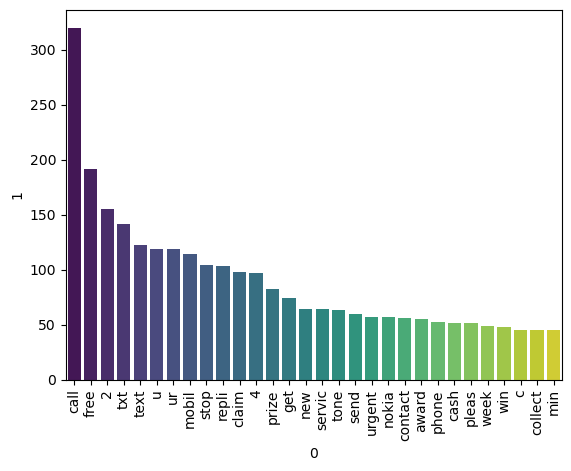

In [71]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [72]:
ham_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [73]:
len(ham_corpus)

9939

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17940\446005548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')


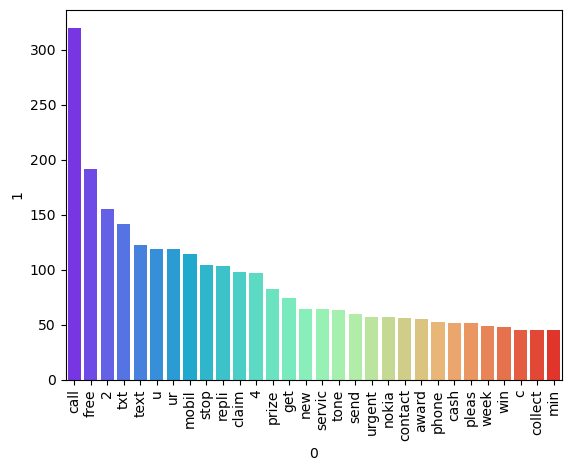

In [74]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [75]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv= CountVectorizer()

In [77]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
#X = cv.fit_transform(df['transformed_text']).toarray()


In [79]:
X.shape

(5169, 6708)

In [80]:
y= df['target'].values

In [81]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [85]:
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()


In [86]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [87]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [88]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [90]:
#!pip install xgboost

In [91]:
svc = SVC(kernel ='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators= 50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state =2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state =2)
xgb = XGBClassifier(n_estimators=50, randomm_state =2)



In [92]:
clfs ={
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [93]:
from sklearn.metrics import accuracy_score,precision_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='binary')

    return accuracy, precision
    

In [94]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [95]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9197292069632496
Precision -  0.9365079365079365
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "randomm_state" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743


In [96]:
temp_df =pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores,'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
performance_df.merge(temp_df,on='Algorithm')

NameError: name 'performance_df' is not defined

In [ ]:
performance_df =pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_melted = pd.melt(performance_df,id_vars='Algorithm',var_name='Metric',value_name='Score')

In [ ]:
performance_melted

In [ ]:
sns.catplot(x = 'Algorithm',y='Score',hue='Metric',data=performance_melted, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# MODEL IMPROVEMENT

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb= MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb),('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb',mnb), ('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))